In [1]:
using BoundaryValueDiffEq, ForwardDiff, DifferentialEquations, OrdinaryDiffEq, Plots


┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.7257282962833884. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.725758020863133. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.7256985722421752. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.7256537119583304. Aborting. There is either an error in your model specification or the true solution is

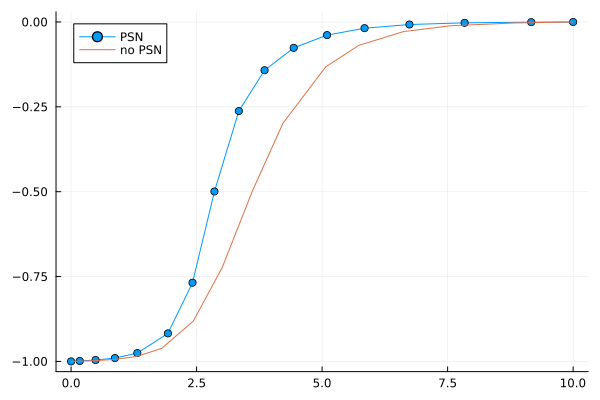

In [9]:
#! ############################# 1D ###############################
# potential from the second version of the Adrian & Peter paper
potential(x) = x^4/4 - x^2/2;

# the characteristic function coming from the constant amplitude distribution, i.e. rho(a) = delta(a-1)/2 + delta(a+1)/2
phi_const(x) = cosh(x) - 1

# initial and final conditions (from paper)
xi = -1.0
xf = 0.0
# guess for initial k
xgp = 0.3
xgnp = 0.1
# initial guess array
u0p = [xi, xgp]
u0np = [xi, xgnp]

# parameter values (from paper)
a = 10.0
lam = 0.01

# timespan (from paper)
tspan = (0.0, 10.0)


# EL equations with PSN
function euler_lagrange_p!(du, u, p, t) 
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + a * lam * ForwardDiff.derivative(phi_const, a*u[2])
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

#EL equations without PSN
function euler_lagrange_np!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2]
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end


function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - xi 
    residual[2] = u[end][1] - xf
end


bvp_p = BVProblem(euler_lagrange_p!, bc2!, u0p, tspan) #PSN
bvp_np = BVProblem(euler_lagrange_np!, bc2!, u0np, tspan) #No PSN



sol_p = solve(bvp_p, Shooting(Vern7())) #PSN                                   <--------------------- this does NOT look fine                     
sol_np = solve(bvp_np, Shooting(Vern7())) #No PSN                              <--------------------- this one looks fine



# plotting instanton
plot(sol_p.t, map(x-> x[1], sol_p.u), label="PSN", marker = :circle)
plot!(sol_np.t, map(x-> x[1], sol_np.u), label="no PSN")



┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability d

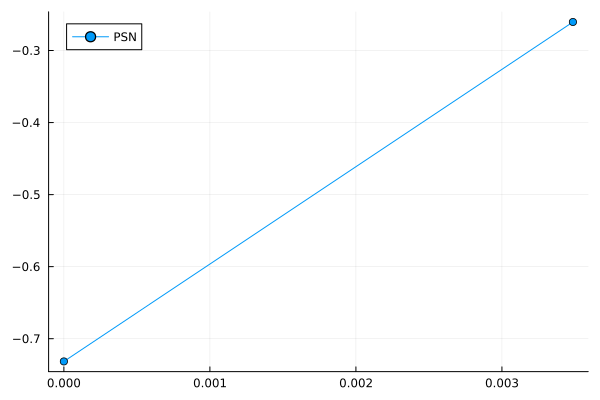

In [16]:
#! ############################# 2D ###############################
# potential from the second version of the Adrian & Peter paper
potential(x) = x^4/4 - x^2/2;

# the characteristic function coming from the constant amplitude distribution, i.e. rho(a) = delta(a-1)/2 + delta(a+1)/2
phi_const(x) = cosh(x) - 1

# initial and final conditions (from paper)
xi = -1.0
xf = 0.0
# guess for initial k
xgp = 0.3
xgnp = 0.1
# initial guess array
u0p = [xi, 0.0, 0.1, 0.0]
u0np = [xi, xgnp]

# parameter values (from paper)
a = 10.0
lam = 0.01
kappa = 1.0
# timespan (from paper)
tspan = (0.0, 10.0)


# EL equations with PSN
function euler_lagrange_p!(du, u, p, t) 
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + u[3] 
    du[2] = -kappa * u[2] + u[4] + a * lam * ForwardDiff.derivative(phi_const, a*u[2])
    du[3] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[3]
    du[4] = - u[3] + u[4] * kappa
end


function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - xi 
    residual[2] = u[end][1] - xf
    residual[3] = u[1][4] - 0
    residual[4] = u[end][4] - 0
end


bvp_p = BVProblem(euler_lagrange_p!, bc2!, u0p, tspan) #PSN



sol_p = solve(bvp_p, Shooting(Vern7())) #PSN                                   <--------------------- this does NOT look fine                     



# plotting instanton
plot(sol_p.t, map(x-> x[1], sol_p.u), label="PSN", marker = :circle)

